# Image Classification - Two Categories

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove Uncertain Images


In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'Images'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        if os.path.isfile(image_path):
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                #os.remove(image_path)

## Load Data




In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('Images')

Found 237 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

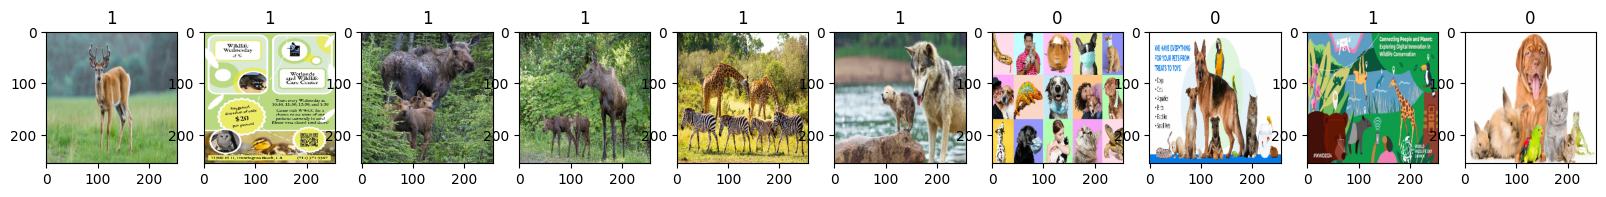

In [22]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data


In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+

## Split Data

In [25]:
train_split = int(0.7 * len(data))
val_split = int(0.2 * len(data))
test_split = int(0.1 * len(data))

train = data.take(train_split)
val = data.skip(train_split).take(val_split)
test = data.skip(train_split + val_split).take(test_split)


## Deep Learning Model

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
train = data


In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 25s 2s/step - loss: 1.1450 - accuracy: 0.5021 - val_loss: 0.6795 - val_accuracy: 0.6250
Epoch 2/20
8/8 [==============================] - 23s 2s/step - loss: 0.6902 - accuracy: 0.6456 - val_loss: 0.6838 - val_accuracy: 0.7188
Epoch 3/20
8/8 [==============================] - 23s 2s/step - loss: 0.6761 - accuracy: 0.6835 - val_loss: 0.6656 - val_accuracy: 0.5938
Epoch 4/20
8/8 [==============================] - 32s 3s/step - loss: 0.6588 - accuracy: 0.5949 - val_loss: 0.5304 - val_accuracy: 0.9062
Epoch 5/20
8/8 [==============================] - 22s 2s/step - loss: 0.6123 - accuracy: 0.6624 - val_loss: 0.5902 - val_accuracy: 0.5938
Epoch 6/20
8/8 [==============================] - 23s 2s/step - loss: 0.5333 - accuracy: 0.8101 - val_loss: 0.4854 - val_accuracy: 0.7812
Epoch 7/20
8/8 [==============================] - 24s 2s/step - loss: 0.4273 - accuracy: 0.8354 - val_loss: 0.4886 - val_accuracy: 0.7812
Epoch 8/20
8/8 [==================

## Plot Performance


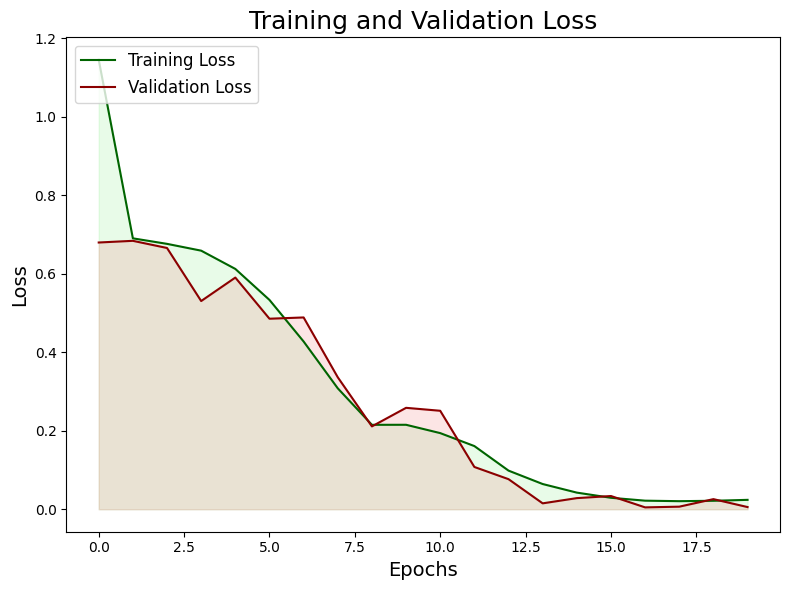

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the training loss
ax.plot(hist.history['loss'], color='darkgreen', label='Training Loss')
# Plot the shaded area for training loss
ax.fill_between(range(len(hist.history['loss'])),
                hist.history['loss'],
                color='lightgreen', alpha=0.2)

# Plot the validation loss
ax.plot(hist.history['val_loss'], color='darkred', label='Validation Loss')
# Plot the shaded area for validation loss
ax.fill_between(range(len(hist.history['val_loss'])),
                hist.history['val_loss'],
                color='lightcoral', alpha=0.2)

# Set the title and axis labels
ax.set_title('Training and Validation Loss', fontsize=18)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

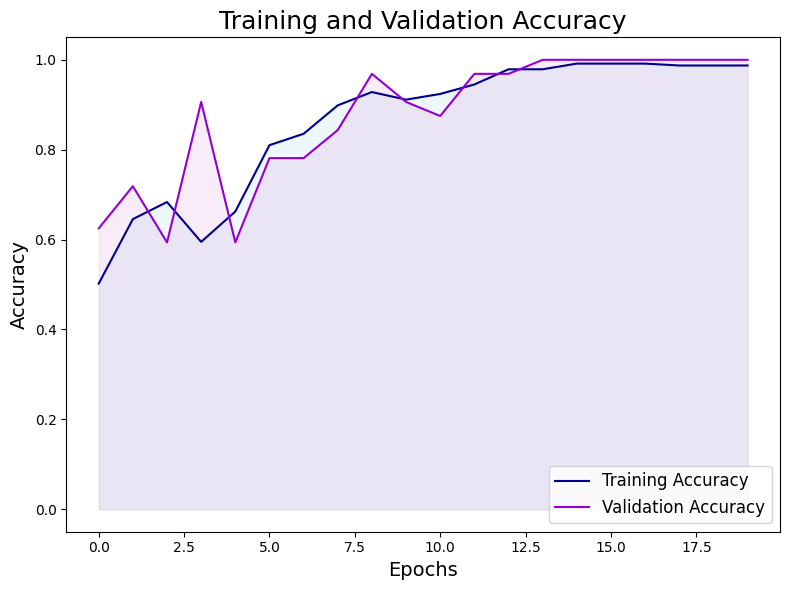

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the training accuracy
ax.plot(hist.history['accuracy'], color='darkblue', label='Training Accuracy')
# Plot the shaded area for training accuracy
ax.fill_between(range(len(hist.history['accuracy'])),
                hist.history['accuracy'],
                color='lightblue', alpha=0.2)

# Plot the validation accuracy
ax.plot(hist.history['val_accuracy'], color='darkviolet', label='Validation Accuracy')
# Plot the shaded area for validation accuracy
ax.fill_between(range(len(hist.history['val_accuracy'])),
                hist.history['val_accuracy'],
                color='plum', alpha=0.2)

# Set the title and axis labels
ax.set_title('Training and Validation Accuracy', fontsize=18)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add a legend
ax.legend(loc='lower right', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Evaluate the model

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


## Test the model

In [42]:
import cv2

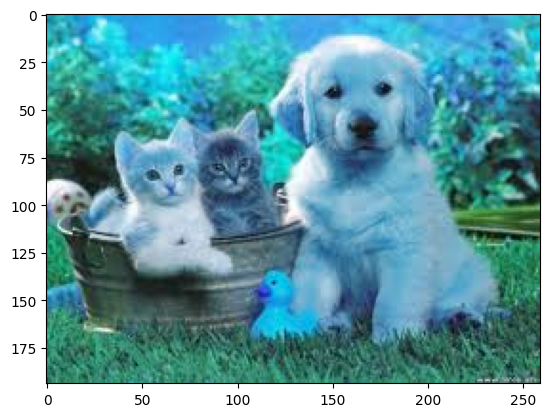

In [67]:
img = cv2.imread('pet_test.jpeg')
plt.imshow(img)
plt.show()

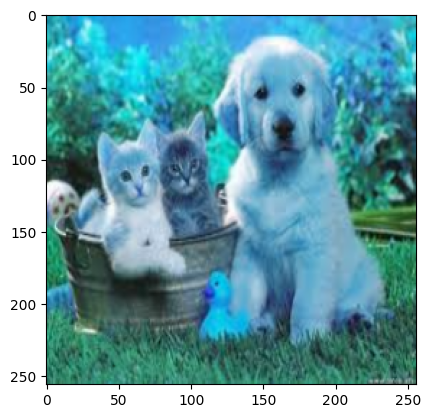

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
y = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 55ms/step


In [72]:
y

array([[0.10899905]], dtype=float32)

In [73]:
if y > 0.5:
    print(f'Predicted image is of Wildlife')
else:
    print(f'Predicted image is of Pet')

Predicted image is of Pet


In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save(os.path.join('models','imageclassifier.h5'))

In [65]:
new_model = load_model('/content/models/imageclassifier.h5')

In [66]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 113ms/step


array([[0.0032771]], dtype=float32)